In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import metrics
bts = pd.read_excel('bank_test.xlsx')
btn = pd.read_excel('bank_train.xlsx')
bts.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
x_train=btn.iloc[:,:-1]
x_test=bts.iloc[:,:-1]
y_train=btn.iloc[:,16]
y_test=bts.iloc[:,16]
labelencoder = LabelEncoder()
x_test.iloc[:,1]=labelencoder.fit_transform(x_test.iloc[:,1])
x_test.iloc[:,2]=labelencoder.fit_transform(x_test.iloc[:,2])
x_test.iloc[:,3]=labelencoder.fit_transform(x_test.iloc[:,3])
x_test.iloc[:,4]=labelencoder.fit_transform(x_test.iloc[:,4])
x_test.iloc[:,6]=labelencoder.fit_transform(x_test.iloc[:,6])
x_test.iloc[:,7]=labelencoder.fit_transform(x_test.iloc[:,7])
x_test.iloc[:,8]=labelencoder.fit_transform(x_test.iloc[:,8])
x_test.iloc[:,10]=labelencoder.fit_transform(x_test.iloc[:,10])
x_test.iloc[:,15]=labelencoder.fit_transform(x_test.iloc[:,15])
x_train.iloc[:,1]=labelencoder.fit_transform(x_train.iloc[:,1])
x_train.iloc[:,2]=labelencoder.fit_transform(x_train.iloc[:,2])
x_train.iloc[:,3]=labelencoder.fit_transform(x_train.iloc[:,3])
x_train.iloc[:,4]=labelencoder.fit_transform(x_train.iloc[:,4])
x_train.iloc[:,6]=labelencoder.fit_transform(x_train.iloc[:,6])
x_train.iloc[:,7]=labelencoder.fit_transform(x_train.iloc[:,7])
x_train.iloc[:,8]=labelencoder.fit_transform(x_train.iloc[:,8])
x_train.iloc[:,10]=labelencoder.fit_transform(x_train.iloc[:,10])
x_train.iloc[:,15]=labelencoder.fit_transform(x_train.iloc[:,15])

In [3]:
## export file and use weka to analyze
file=pd.concat([x_train,y_train],axis=1)
file.to_csv('/Users/mac/Documents/smx.csv')

In [4]:
x_train=x_train.drop(columns=['contact','day','pdays','default','education','balance'],axis=1)
x_test=x_test.drop(columns=['contact','day','pdays','default','education','balance'],axis=1)

In [5]:
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.fit_transform(x_train)

The optimal number of neighbors is 32
The optimal score is 0.88373


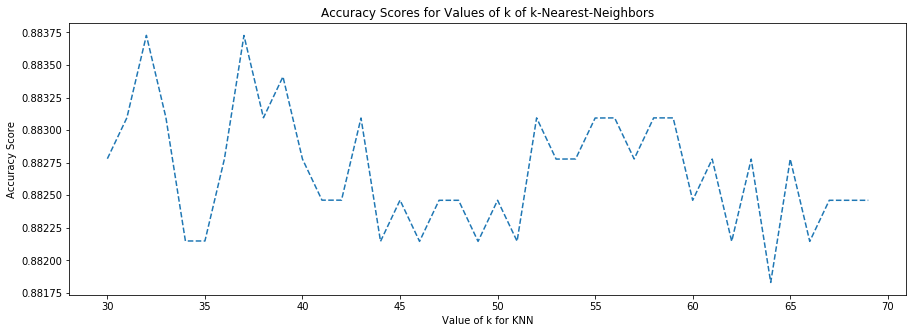

Accuracy for predicting test: 0.9004424778761062


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
scores=[]
lrange=list(range(30,70))
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy') 
    scores.append(score.mean())
optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k) 
print("The optimal score is %.5f" % max(scores))
plt.figure(2,figsize=(15,5))
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
knn_model=KNeighborsClassifier(optimal_k)
knn_model.fit(x_train,y_train)
print("Accuracy for predicting test:",knn_model.score(x_test,y_test))